## Bank Marketing - Portugeese Bank dataset 

### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### campaign data related
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (n)umeric

### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [5]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('bank.csv')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Checking for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There are no missing values

In [13]:
data.shape

(45211, 17)

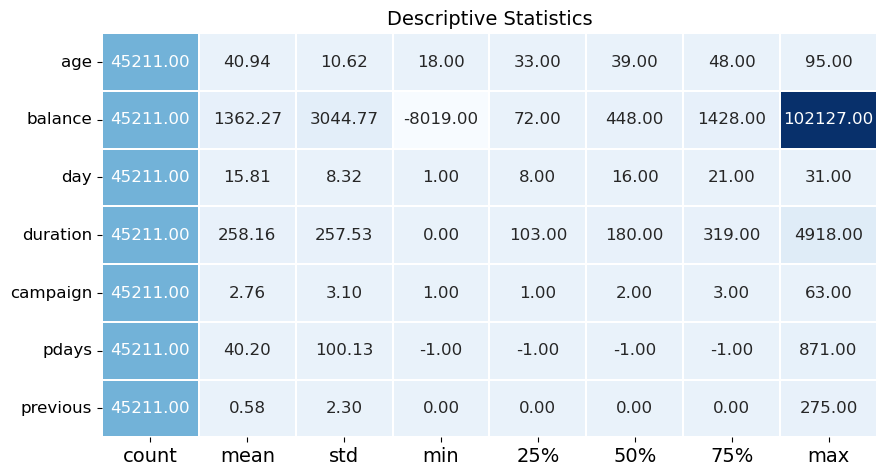

In [14]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = data.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [15]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0        11.764706
1        11.764706
2        11.764706
3        17.647059
4        23.529412
           ...    
45206     5.882353
45207     5.882353
45208     0.000000
45209     5.882353
45210     0.000000
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: poutcome, Percentage: 81.75%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 23.53%


<Axes: >

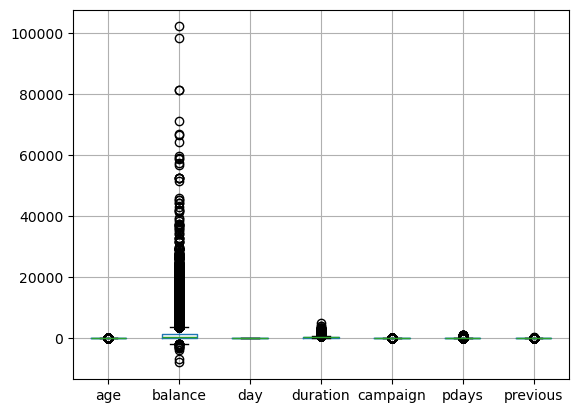

In [16]:
data.boxplot()

In [17]:
# Lets get a copy of the dataset
data1=data.copy()
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Lets dive age into groups

In [19]:
age1=data1[(data1['age']>=18) & (data1['age']<=28)]
age2=data1[(data1['age']>=29) & (data1['age']<=39)]
age3=data1[(data1['age']>=40) & (data1['age']<=50)]
age4=data1[(data1['age']>=51) & (data1['age']<=60)]
age5=data1[(data1['age']>=61)]

In [20]:
total=[]
list1=[age1,age2,age3,age4,age5]
for i in list1:
  total.append(i.shape[0])
yes_count=[]
for i in list1:
  yes_count.append(i[i['y']=='yes'].count()['y'])

In [21]:
age_final=pd.DataFrame()
age_final['Age Groups']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percetage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percetage',ascending=False)

,Age Groups,Total,Yes Count,Percetage
4,61+,1188,502,42.255892
0,18-28,4088,757,18.517613
1,29-39,19274,2084,10.812494
3,51-60,8067,811,10.053304
2,40-50,12594,1135,9.012228


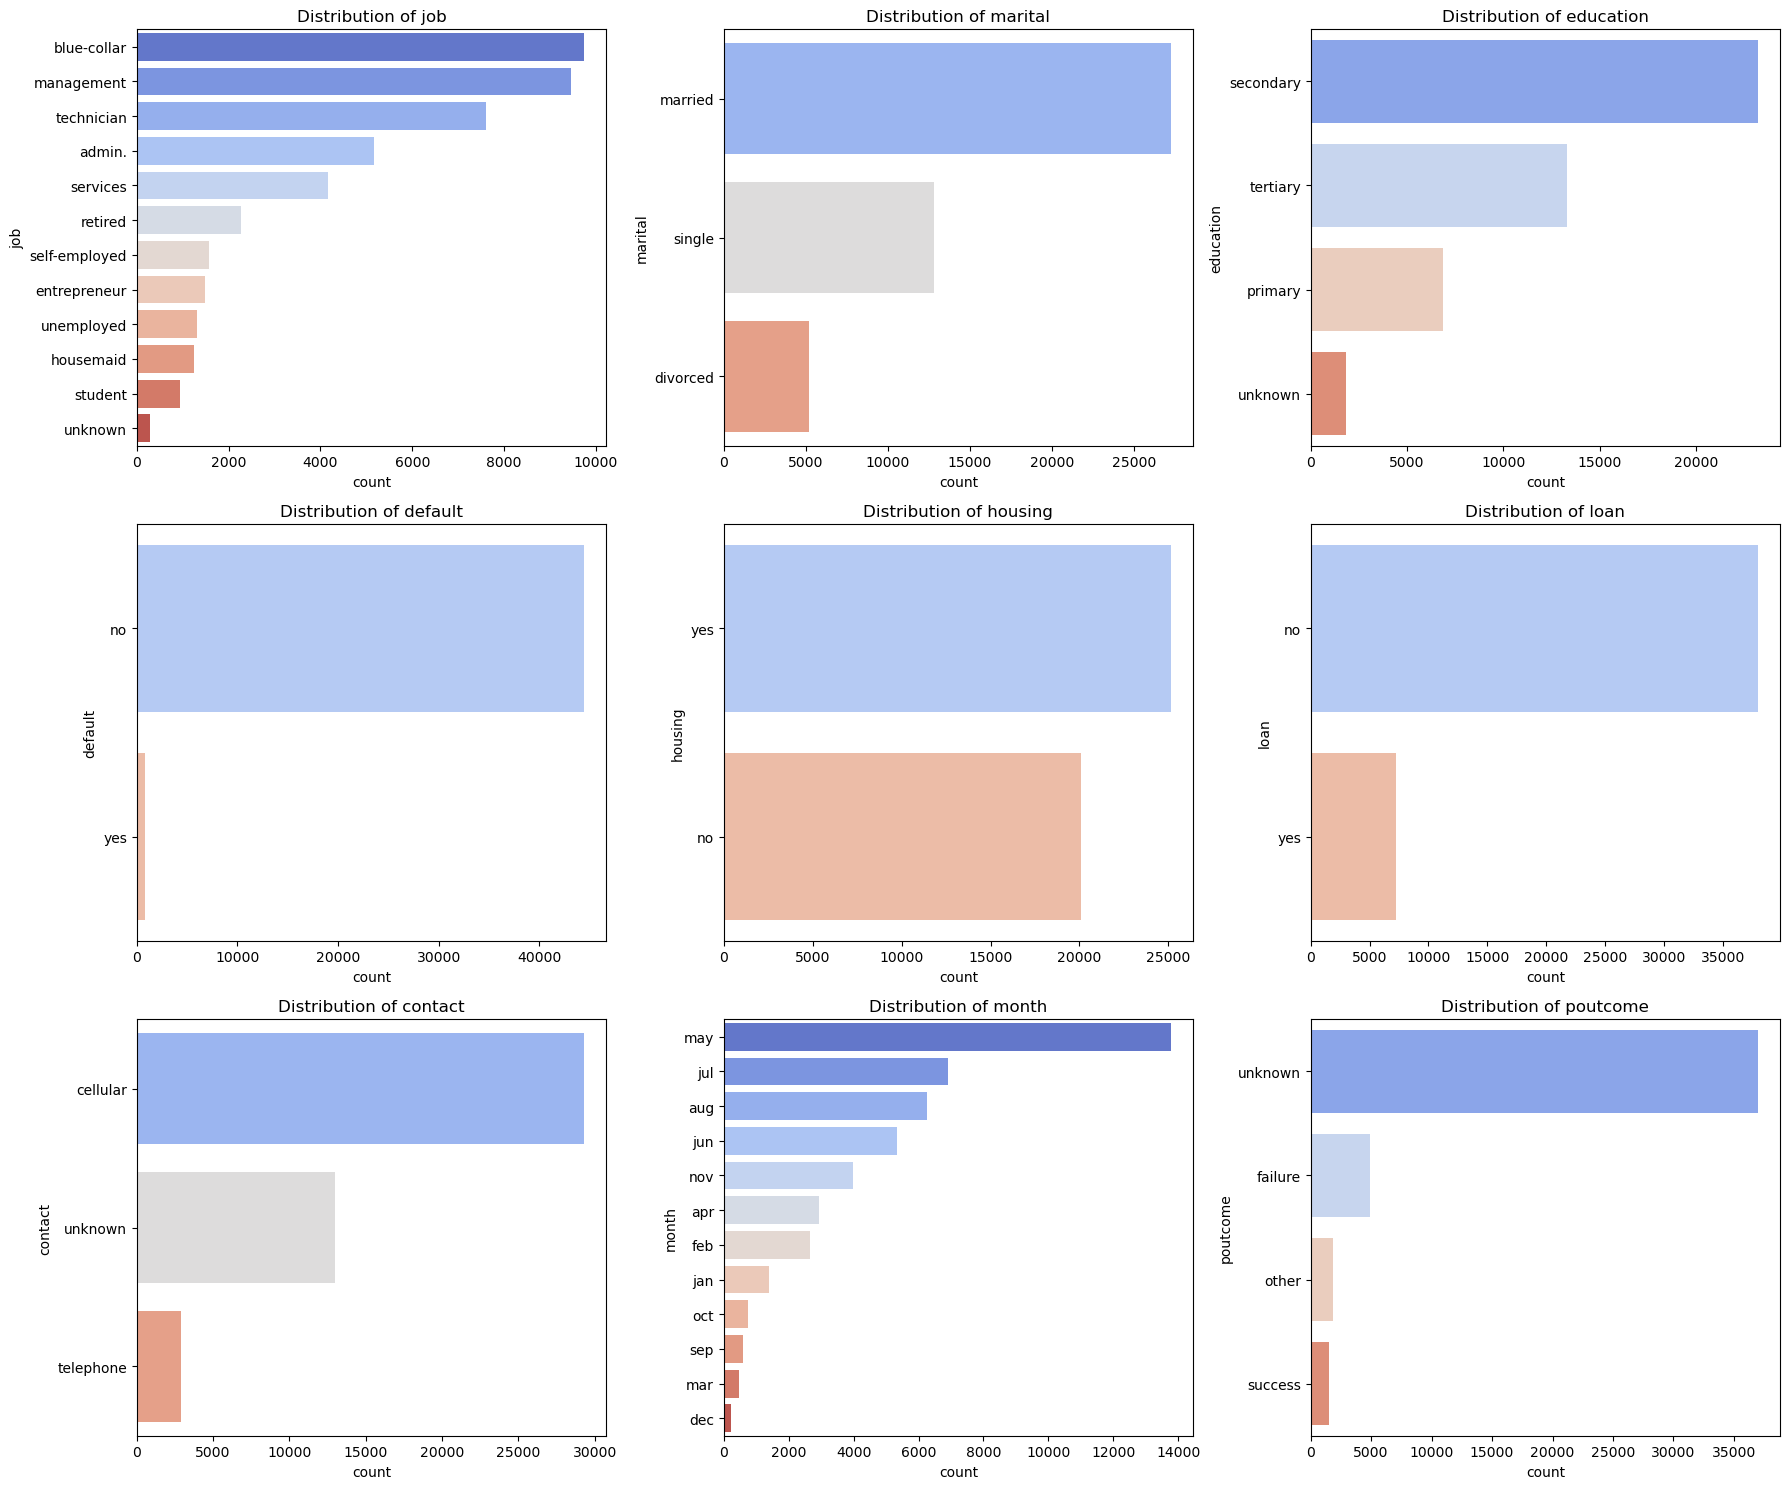

In [38]:
# Plot categorical feature distributions
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(y=data[col], palette="coolwarm", ax=axes[i], order=data[col].value_counts().index)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### Categorical Feature Insights:
<b>job:</b> Most clients are in "blue-collar," "management," and "technician" jobs.<br>
<b>marital:</b> Majority are "married," followed by "single" and "divorced."<br>
<b>education:</b> Mostly "secondary" education level.<br>
<b>default:</b> Almost all clients have "no" default.<br>
<b>housing & loan:</b> Most have housing loans, fewer have personal loans.<br>
<b>contact:</b> Majority have "unknown" contact type (indicating lack of historical data).<br>
<b>month: </b>Most campaigns happen in "may."<br>
<b>poutcome:</b> Mostly "unknown," meaning previous campaigns weren't recorded.<br>

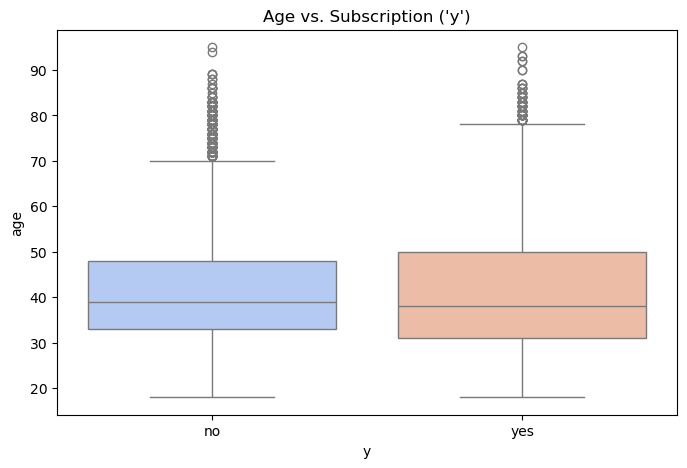

In [44]:
# does age affect the subscription?
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['y'], y=data['age'], palette="coolwarm")
plt.title("Age vs. Subscription ('y')")
plt.show()